<a href="https://colab.research.google.com/github/weslei-silva87/Previsao-Faturamento-Inteligencia-Artificial/blob/main/Previs%C3%A3o_Faturamento_Python_Avan%C3%A7ado_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Carregamento dos Dados
tabela = pd.read_csv('/content/Base Investimento.csv')
display(tabela)


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [ ]:
# Verificar valores nulos
print(tabela.isnull().sum())

TV        0
Radio     0
Jornal    0
Vendas    0
dtype: int64


In [ ]:
# verificando dados duplicados
tabela.duplicated().sum()


0

In [ ]:
# Analisando Informações dos dados
print(tabela.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


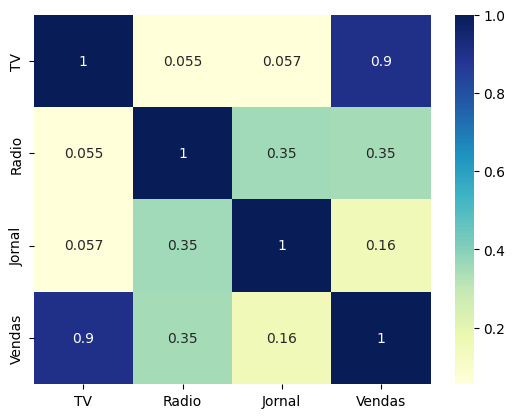

In [ ]:

# Análise exploratória e visualização da correlação
sns.heatmap(tabela.corr(), annot=True, cmap="YlGnBu")
plt.show()

Criando Inteligência Artificial

In [ ]:
# Criando inteligência artificial
# y = quem você quer prever
y = tabela["Vendas"]

# x = quem vou usar pra prever os valores
x = tabela[["TV", "Radio","Jornal"]]

In [ ]:

# Preparando teste e treino
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30)

In [ ]:

# Modelos de inteligência artificial
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:

# criando inteligencia Artificial
#y=quem voce quer prever
y = tabela["Vendas"]

#x= quem vou usar pra prever os valores
x = tabela[["TV", "Radio","Jornal"]]

#preparando teste e treino
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.30)

# modelo de intelegencia artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#criando os modelos de regressão
modelo_regressao_linear = LinearRegression()
modelo_arvore_decisao = RandomForestRegressor()


In [ ]:

#treinando os modelos (regraão linear e arvore de decisão)
modelo_regressao_linear.fit(x_treino, y_treino)
modelo_arvore_decisao.fit(x_treino, y_treino)

#calculando R² melhor modelo mais proximo de 100 e melhor
previsao_regressao_linear = modelo_regressao_linear.predict(x_teste)
previsao_arvore_decisao = modelo_arvore_decisao.predict(x_teste)

#mostrando resultado
print(r2_score(y_teste, previsao_regressao_linear))
print(r2_score(y_teste, previsao_arvore_decisao))


0.9031115987035749
0.941748110359695


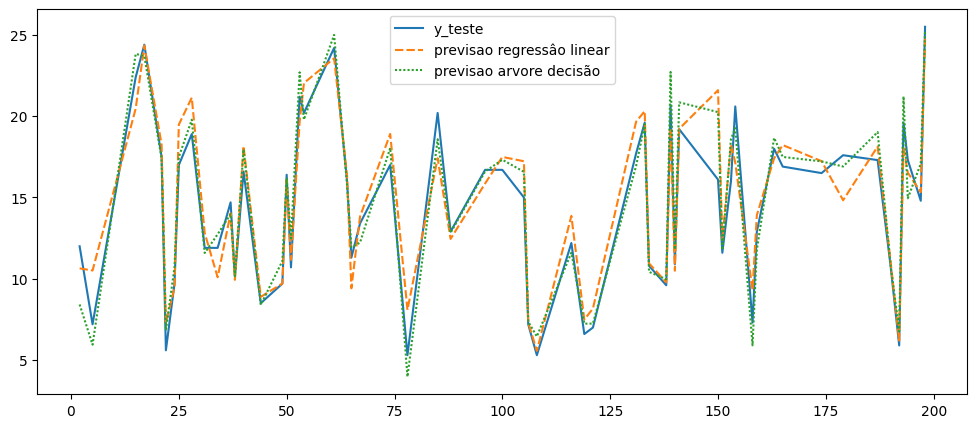

In [ ]:

# Vizualizando grafico de resultados
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar["previsao regressâo linear"] = previsao_regressao_linear
tabela_auxiliar["previsao arvore decisão"] = previsao_arvore_decisao

plt.figure(figsize=(12, 5))
sns.lineplot(data=tabela_auxiliar)
plt.show()


In [ ]:

# Criando o DataFrame vazio
dados_novos = pd.DataFrame(columns=['TV', 'Radio', 'Jornal'])

# Solicitando os valores ao usuário e adicionando ao DataFrame
for coluna in dados_novos.columns:
    valores = []
    for i in range(3):
        valor = float(input(f"Por favor, insira o valor para a coluna {coluna}: "))
        valores.append(valor)
    dados_novos[coluna] = valores


Por favor, insira o valor para a coluna TV: 10.00
Por favor, insira o valor para a coluna TV: 20.00
Por favor, insira o valor para a coluna TV: 30.00
Por favor, insira o valor para a coluna Radio: 5.00
Por favor, insira o valor para a coluna Radio: 10.00
Por favor, insira o valor para a coluna Radio: 15.00
Por favor, insira o valor para a coluna Jornal: 15.00
Por favor, insira o valor para a coluna Jornal: 30.00
Por favor, insira o valor para a coluna Jornal: 45.00


In [ ]:
# Mostrando o DataFrame na tela
print("\nTabela com os novos valores Investimento")
print(dados_novos)



Tabela com os novos valores Investimento
     TV  Radio  Jornal
0  10.0    5.0    15.0
1  20.0   10.0    30.0
2  30.0   15.0    45.0


Previsão de Faturamento

In [ ]:
# Exibir os resultados de cada coluna com 3 casas decimais
previsao = modelo_arvore_decisao.predict(dados_novos)
for coluna, valor in zip(dados_novos.columns, previsao):
    valor_arredondado = round(valor, 3)
    print(f"Resultado previsto {coluna}: {valor_arredondado}")




Resultado previsto TV: 5.375
Resultado previsto Radio: 7.299
Resultado previsto Jornal: 8.039


Afirmamos com segurança que o projeto atingiu seus objetivos, dotando a empresa de uma ferramenta robusta para embasar suas decisões por meio de dados concretos. Com um modelo de previsão confiável em mãos, a empresa se encontra em uma posição privilegiada para maximizar seus investimentos em publicidade e propaganda, impulsionando, assim, seu crescimento e sucesso nos negócios.